## Uppgift 2

In [2]:
import pandas as pd
import numpy as np

xls = pd.ExcelFile('../Data/fhm-covid19-vacc.xlsx') # imports the excelfile from directory
df1 = pd.read_excel(xls, 'Vaccinerade kommun och ålder') # reads only the specific sheet
df1.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,671,450,0.598039,0.401070
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4174,3324,0.649347,0.517113
2,1,Stockholm,114,Upplands Väsby,30-39,7088,4976,4341,0.702032,0.612444
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5308,5010,0.780359,0.736548
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5360,5190,0.866613,0.839127


In [3]:
df1.dtypes

Län                          int64
Län_namn                    object
Kommun                       int64
Kommun_namn                 object
Ålder                       object
Befolkning                   int64
Antal minst 1 dos            int64
Antal färdigvaccinerade      int64
Andel minst 1 dos          float64
Andel färdigvaccinerade    float64
dtype: object

In [4]:
df1.isna().sum()

Län                        0
Län_namn                   0
Kommun                     0
Kommun_namn                0
Ålder                      0
Befolkning                 0
Antal minst 1 dos          0
Antal färdigvaccinerade    0
Andel minst 1 dos          0
Andel färdigvaccinerade    0
dtype: int64

In [5]:
df1.nunique()

Län                          21
Län_namn                     21
Kommun                      290
Kommun_namn                 290
Ålder                         9
Befolkning                 1989
Antal minst 1 dos          1897
Antal färdigvaccinerade    1876
Andel minst 1 dos          2540
Andel färdigvaccinerade    2558
dtype: int64

In [6]:
df1["Befolkning"].sum()

8541497

In [7]:
kids_under_16 = 10350000 - df1["Befolkning"].sum()
kids_under_16

1808503

## Antal län, kommuner, befolkning & barn under 16
- län = 21
- kommuner = 290
- total befolkning i dataset = 8541497 (8,54m)
- barn under 16 = ca 1808503 (1,8m)

In [8]:
df1.sum() 

Län                                                                    34524
Län_namn                   StockholmStockholmStockholmStockholmStockholmS...
Kommun                                                               3607254
Kommun_namn                Upplands VäsbyUpplands VäsbyUpplands VäsbyUppl...
Ålder                      16-1718-2930-3940-4950-5960-6970-7980-8990 ell...
Befolkning                                                           8541497
Antal minst 1 dos                                                    7212619
Antal färdigvaccinerade                                              6791446
Andel minst 1 dos                                                2239.269597
Andel färdigvaccinerade                                          2087.192567
dtype: object

In [9]:
dff = df1.groupby("Län_namn").sum().reset_index() # groups around 'Län_namn' column and resets index
dff["Andel minst 1 dos"] = dff["Antal minst 1 dos"]/dff["Befolkning"] # calulates percentage of pop with 1 dose
dff["Andel färdigvaccinerade"] = dff["Antal färdigvaccinerade"]/dff["Befolkning"] # calculates percantage of pop fully vaccinated

<Figure size 1500x600 with 0 Axes>

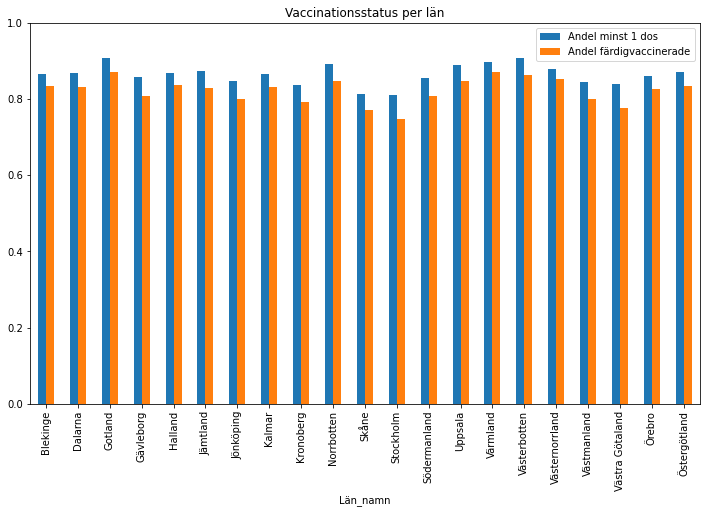

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

fig = plt.figure(figsize=(15,6), dpi=100)
fig = dff.plot(kind = "bar", x = "Län_namn", y = ["Andel minst 1 dos", "Andel färdigvaccinerade"], 
                figsize = (12,7), ylim = (0,1), title = "Vaccinationsstatus per län" )


In [161]:
fig = px.bar(dff, x = "Län_namn", y = ["Andel minst 1 dos", "Andel färdigvaccinerade"], labels = {'value': 'Andel', 'Län_namn': 'Län'}, 
                title = "Vaccinationsstatus andel av befolkning per län", 
                )
fig.update_layout(barmode = 'group',
                legend_title = None)
fig.show()

In [137]:
df3 = df1.groupby("Län_namn").sum().reset_index() # groups data based on column ['Län_namn']
df3.head()

,Län_namn,Län,Kommun,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,Blekinge,450,48474,132463,114711,110497,38.276835,36.326203
1,Dalarna,2700,277389,238920,207596,198688,116.821103,110.490737
2,Gotland,81,8820,50863,46143,44359,8.175003,7.855446
3,Gävleborg,1890,193761,239812,205563,193853,76.386930,71.121947
4,Halland,702,74025,275840,239400,230634,46.449900,44.128191


<Figure size 1500x600 with 0 Axes>

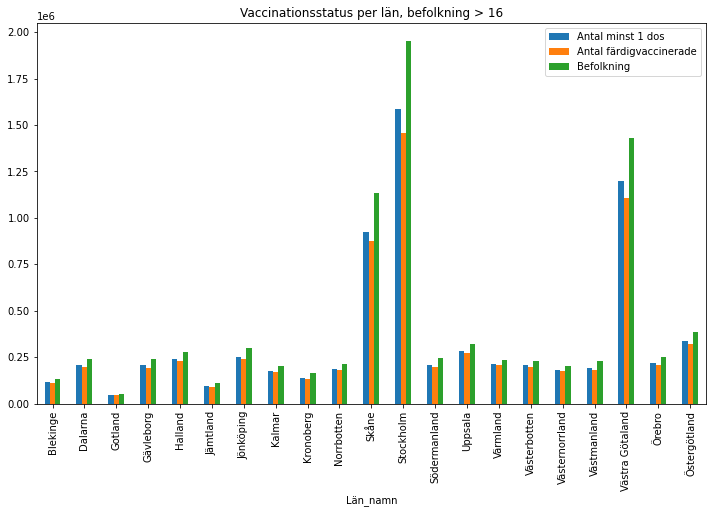

In [141]:
fig = plt.figure(figsize=(15,6), dpi=100)
fig = df3.plot(kind = "bar", x = "Län_namn", y = ["Antal minst 1 dos", "Antal färdigvaccinerade",
                "Befolkning"], figsize = (12,7), title = "Vaccinationsstatus per län, befolkning > 16" )

In [160]:
fig = px.bar(df3, x = "Län_namn", y = ["Antal minst 1 dos", "Antal färdigvaccinerade",
                "Befolkning"], labels = {'value': 'Antal', 'Län_namn': 'Län'}, 
                title = "Vaccinationsstatus & befolkning över 16", 
                )
fig.update_layout(barmode = 'group',
                legend_title = None)
fig.show()